# Importing All The Necessary Packages For Preprocessing and Segementation

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
import pandas as pd
from zipfile import ZipFile
from skimage.transform import AffineTransform, warp
from skimage import io, img_as_ubyte
import random
from scipy.ndimage import rotate
import albumentations as A
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from datetime import datetime 
from keras import backend, optimizers
import keras

# Creating Directories To store the images and masks

In [ ]:
#Creating a dir for storing the images and masks -(Image_dataset)
os.mkdir('/content/sample_data/img_unzip2') 

In [ ]:
#unzipping the Image_dataset(which contains images and its ground truth in differnt files)andextracting the.zip file into a single folder
#Note: Check corresponding loacl path where the image is stored before executing the below lines of code 
ZipFile("/content/drive/MyDrive/Images_dataset.zip").extractall("/content/sample_data/img_unzip2")

In [ ]:
#Creating two more dir to store our albumented images
os.mkdir('/content/sample_data/aug_img1')
os.mkdir('/content/sample_data/aug_mask1')  

# Lets Perform Albumentations to increase training set images and for better model predictions

In [ ]:
images_to_generate=500
images_path="/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/" #path to original images
masks_path = "/content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/"#path to the original mask
img_augmented_path="/content/sample_data/aug_img1/" # path to store aumented images
msk_augmented_path="/content/sample_data/aug_mask1/" # path to store aumented masks
images=[] # to store paths of images from folder
masks=[]

for im in os.listdir(images_path):  # read image name from folder and append its path into "images" array     
    images.append(os.path.join(images_path,im))

for msk in os.listdir(masks_path):  # read image name from folder and append its path into "images" array     
    masks.append(os.path.join(masks_path,msk))


aug = A.Compose([
    A.VerticalFlip(p=0.5),              
    A.RandomRotate90(p=0.5),
    A.HorizontalFlip(p=1),
    A.Transpose(p=1),
    #A.ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
    A.GridDistortion(p=1)
    ]
)

#random.seed(42)

i=1   # variable to iterate till images_to_generate


while i<=images_to_generate: 
    number = random.randint(0, len(images)-1)  #Pick a number to select an image & mask
    image = images[number]
    mask = masks[number]
    print(image, mask)
    #image=random.choice(images) #Randomly select an image name
    original_image = io.imread(image)
    original_mask = io.imread(mask)
    
    augmented = aug(image=original_image, mask=original_mask)
    transformed_image = augmented['image']
    transformed_mask = augmented['mask']

        
    new_image_path= "%s/augmented_%s.jpg" %(img_augmented_path, i)
    new_mask_path = "%s/augmented_%s.jpg" %(msk_augmented_path, i)
    io.imsave(new_image_path, transformed_image)
    io.imsave(new_mask_path, transformed_mask)
    i =i+1

/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J2513.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J2513.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H2840.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H2840.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J387.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J387.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H2840.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H2840.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_4.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/G2772.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/G2772.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/G874.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/G874.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H122.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H122.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H434.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H434.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H585.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H585.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J883.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_37.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H513.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H513.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/G2772.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/G2772.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H122.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H122.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H2769.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H2769.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H525.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H525.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/G2772.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_48.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H565.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H565.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/L704.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/L704.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H696.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H696.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J2526.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J2526.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H513.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H513.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/G799.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_59.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H612.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H612.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H513.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H513.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/K360.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/K360.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J2874.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J2874.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/G2567.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/G2567.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H513.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/P

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_65.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H553.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H553.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H330.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H330.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J638.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J638.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/7J01.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/7J01.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H616.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H616.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J754.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plott

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_77.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H327.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H327.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H166.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H166.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H388.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H388.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J495.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J495.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H289.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H289.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/6J01.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plott

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_109.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H525.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H525.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/G2578.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/G2578.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J387.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J387.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H243.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H243.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J144.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J144.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H006.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_160.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J2520.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J2520.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J2515.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J2515.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J2518.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J2518.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H2840.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H2840.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_164.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J629.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J629.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H078.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H078.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H006.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H006.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H289.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H289.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H544.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H544.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H030.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plott

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_186.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H434.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H434.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H243.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H243.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H2613.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H2613.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H243.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H243.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H006.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H006.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J586.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_200.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H2765.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H2765.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J114.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J114.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H755.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H755.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/7J01.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/7J01.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/G2712.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/G2712.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H289.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/P

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_205.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H509.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H509.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J114.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J114.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H501.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H501.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J373.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J373.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J365.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J365.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J185.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plott

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_217.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/G2828.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/G2828.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J586.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J586.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_219.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J132.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J132.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H585.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H585.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_222.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J185.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J185.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H330.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H330.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H509.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H509.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J2513.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J2513.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J542.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J542.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H2550.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Pl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_251.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J2518.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J2518.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H509.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H509.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J204.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J204.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J332.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J332.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H228.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H228.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/G2653.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Pl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_258.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H2840.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H2840.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H396.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H396.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H327.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H327.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J2513.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J2513.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/6J02.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/6J02.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J332.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/P

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_268.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J180.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J180.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H220.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H220.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H243.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H243.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H363.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H363.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J430.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J430.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/G874.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plott

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_277.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/G2772.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/G2772.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/6J02.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/6J02.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J2521.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J2521.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H509.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H509.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J144.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J144.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J2518.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_288.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H030.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H030.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H2840.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H2840.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H565.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H565.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J430.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J430.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J828.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J828.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H330.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_304.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H108.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H108.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H2517.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H2517.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/G2712.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/G2712.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H108.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H108.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/G874.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/G874.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H509.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/P

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_319.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H2841.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H2841.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J144.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J144.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J114.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J114.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H166.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H166.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H434.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H434.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/G799.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_334.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H289.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H289.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H151.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H151.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H220.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H220.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J542.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J542.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J2874.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J2874.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H696.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_366.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J454.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J454.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/L704.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/L704.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H2552.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H2552.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H122.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H122.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H330.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H330.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J204.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_417.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J144.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J144.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J185.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J185.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J542.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J542.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J387.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J387.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/G2772.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/G2772.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H565.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_429.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J387.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J387.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H363.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H363.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J754.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J754.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J495.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J495.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H327.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H327.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J629.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plott

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_485.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J883.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J883.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H391.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H391.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J828.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J828.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H243.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H243.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J2520.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J2520.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H509.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: /content/sample_data/aug_mask1//augmented_494.jpg is a low contrast image


/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/K360.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/K360.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J357.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J357.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H2765.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H2765.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H2765.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/H2765.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/J204.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/Plotted Figures/J204.jpg
/content/sample_data/img_unzip2/Images_dataset/Images dataset/image_chips/H513.jpg /content/sample_data/img_unzip2/Images_dataset/Images dataset/P

# For Predicting the Segmented Mask We are using a Attention-Unet Model Which we are directly importing from keras library  

In [ ]:
!pip install keras-unet-collection

     |████████████████████████████████| 67 kB 5.6 MB/s 


In [ ]:
from keras_unet_collection import models, losses

# Performing Few preprocessing beforing building the model and fitting it since we need all the train images in a similar dimension

In [ ]:
# force channels-first ordering for all loaded images
backend.set_image_data_format('channels_last')  


image_directory = '/content/sample_data/aug_img1/'#retriving the paths of the auguented images
mask_directory = '/content/sample_data/aug_mask1/'#retriving the paths of the auguented masks



SIZE = 256# Since our backbone model is a vgg16 , we convert the images to 256*256 dimension from 750*750 
image_dataset = []   
mask_dataset = []  

images = os.listdir(image_directory)
for i, image_name in enumerate(images):    
    if (image_name.split('.')[1] == 'jpg'):
        #print(image_directory+image_name)
        image = cv2.imread(image_directory+image_name, 1)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))#resizing the image to 256*256
        image_dataset.append(np.array(image))#appending the image converted to an array format to a list 



masks = os.listdir(mask_directory)
for i, image_name in enumerate(masks):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(mask_directory+image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        mask_dataset.append(np.array(image))


#Normalize images
image_dataset = np.array(image_dataset)/255.
#we aren't normalizing masks, just rescaling to 0 to 1.
mask_dataset = np.expand_dims((np.array(mask_dataset)),3) /255.

# Now We will Perfom Train_Validation Split here we have considered 80:20 split for train_val data and also will Visualise the Image and its corresponding mask for refrence 

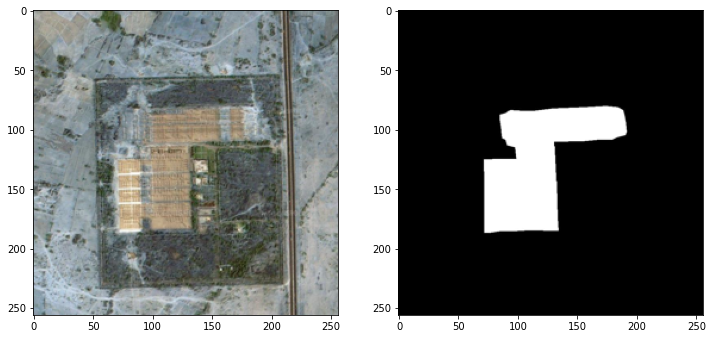

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.2, random_state = 0)

#viewing few images 
import random
import numpy as np
image_number = random.randint(0, len(X_train))#generate a random number from length of the X_train data
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (256, 256, 3)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (256, 256)), cmap='gray')
plt.show()
###
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]
num_labels = 1  #Binary
input_shape = (IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS)
batch_size = 8

In [ ]:
# to Get more info about attention unet model run the below line 
#help(models.att_unet_2d) 

We are fitting and training our model with pretrained weights from Imagenet and since the output is a binary classification we are using output activation as Sigmoid and using VGG16 Cnn models in each block and we are ranging the number of filters from 64--->1024 while maxpooling after ever convolutional block and upsampling Viceversa and , the loss function used here is Binary_Crossentropy and Optimizer is Adam and the metrics we have considered is Dice.Coeffecient and accuracy.

In [ ]:
model_att_unet = models.att_unet_2d((256, 256, 3), filter_num=[64, 128, 256, 512, 1024], 
                           n_labels=num_labels, 
                           stack_num_down=2, stack_num_up=2, 
                           activation='ReLU', 
                           atten_activation='ReLU', attention='add', 
                           output_activation='Sigmoid', 
                           batch_norm=True, pool=False, unpool=False, 
                           backbone='VGG16', weights='imagenet', 
                           freeze_backbone=True, freeze_batch_norm=True, 
                           name='attunet')


model_att_unet.compile(loss='binary_crossentropy', optimizer=Adam(lr = 1e-3), 
              metrics=['accuracy', losses.dice_coef])

print(model_att_unet.summary())

start3 = datetime.now() 

att_unet_history = model_att_unet.fit(X_train, y_train, 
                    verbose=1,
                    batch_size = batch_size,
                    validation_data=(X_test, y_test ), 
                    shuffle=False,
                    epochs=150)

stop3 = datetime.now()
#Execution time of the model 
execution_time_att_Unet = stop3-start3
print("Attention UNet execution time is: ", execution_time_att_Unet)

model_att_unet.save('Ieee_unet_collection_att_UNet.hdf5')

/usr/local/lib/python3.7/dist-packages/keras_unet_collection/_backbone_zoo.py:45: UserWarning: 

Backbone VGG16 does not use batch norm, but other layers received batch_norm=True
  warnings.warn(param_mismatch);


58892288/58889256 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "attunet_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
VGG16_backbone (Functional)     [(None, 256, 256, 64 14714688    input_1[0][0]                    
__________________________________________________________________________________________________
attunet_up0_decode_trans_conv ( (None, 32, 32, 512)  2359808     VGG16_backbone[0][4]             
__________________________________________________________________________________________________
attunet_up0_decode_bn (BatchNor (None, 32, 32, 512)  2048        attunet_up0_decode_trans_conv[0][
______________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# Lets Plot and Check The Training and VAlidation Loss to check If the Data isnt Over Fitting /Underfitting  

In [ ]:
history = att_unet_history

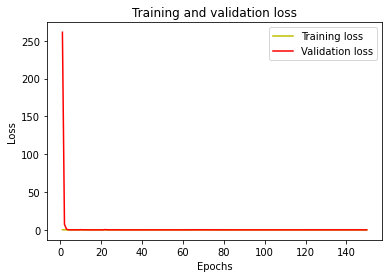

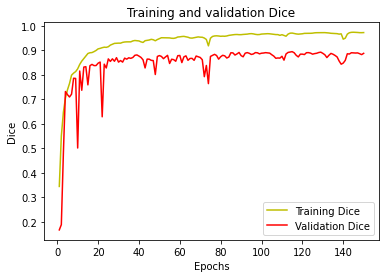

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['dice_coef']
#acc = history.history['accuracy']
val_acc = history.history['val_dice_coef']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Dice')
plt.plot(epochs, val_acc, 'r', label='Validation Dice')
plt.title('Training and validation Dice')
plt.xlabel('Epochs')
plt.ylabel('Dice')
plt.legend()
plt.show()


Now lets Check how good are the Maps been Predicted W.r.t Validation Data First along with ITs IoU Score 

# Final Test image Mask Segmentation From the Origial Image

In [ ]:
os.mkdir('/content/sample_data/Final_test_image')
os.mkdir('/content/sample_data/Final_test_mask')

In [ ]:
def get_paths():
  paths=[os.path.join('/content/drive/MyDrive/test_data/',f)for f in os.listdir('/content/drive/MyDrive/test_data/')]
  return paths
full_file_paths=get_paths()

# Checking for one Individual image predicted mask 

True

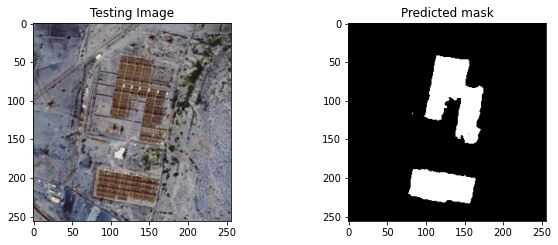

In [ ]:
SIZE = 256

image = cv2.imread('/content/drive/MyDrive/test_data/mosaic_test18.jpg', 1)
image = Image.fromarray(image)
image = image.resize((SIZE, SIZE))


te = np.array(image)/255.
input=np.expand_dims(te, 0)
#input.shape

prediction = (model.predict(input)[0,:,:,0] > 0.5).astype(np.uint8)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(image, cmap='gray')
plt.subplot(232)
plt.title('Predicted mask')
plt.imshow(prediction, cmap='gray')
path='/content/sample_data/Final_test_mask/'
cv2.imwrite(os.path.join(path,"%smask%s"+str(count)+".jpg"), prediction)


In [ ]:
def final_mask1(i):
    SIZE = 256
    image = cv2.imread(i, 1)
    image = Image.fromarray(image)
    image = image.resize((SIZE, SIZE))


    te = np.array(image)/255.
    input=np.expand_dims(te, 0)
    #input.shape

    prediction = (model.predict(input)[0,:,:,0] > 0.5).astype(np.uint8)
#     print(prediction)
    
#     dest = "pred_test_images/"+i[10:]
#     print(dest)
#     cv2.imwrite(dest, prediction)

    pred = np.dstack([prediction, prediction, prediction])
    pred = (pred * 255).astype(np.uint8)

    cv2.imwrite('/content/sample_data/Final_test_mask/'+str(count)+'.jpg', pred)
    print('p_test_images/'+i[10:-4]+'.jpg')
    plt.figure(figsize=(16, 8))
    plt.subplot(231)
    plt.title('Testing Image')
    plt.imshow(image, cmap='gray')
    plt.subplot(232)
    plt.title('Predicted mask')
    plt.imshow(prediction, cmap='gray')

In [ ]:
count=0
for i in full_file_paths:
  final_mask1(i)
  count+=1

# After retriving the predicted masksfor self refrence and storing it in the local path of colab continue to the Final_preprocessing.py and run the code to perfom final processing and to extract the array format of the output.